In [1]:
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt

import os, sys

from collections import defaultdict

Matplotlib is building the font cache; this may take a moment.


In [2]:
mx_base = "/mnt/extproj/projekte/textmining/"
outDirectory = mx_base + "/scai_eval/"

In [3]:
results_test_scilg_bionlp = pickle.load(open(outDirectory+"/results_test_scilg_bionlp.pickle", 'rb'))
results_train_scilg_bionlp = pickle.load(open(outDirectory+"/results_train_scilg_bionlp.pickle", 'rb'))

results_test_bionlp_bionlp = pickle.load(open(outDirectory+"/results_test_bionlp_bionlp.pickle", 'rb'))
results_train_bionlp_bionlp = pickle.load(open(outDirectory+"/results_train_bionlp_bionlp.pickle", 'rb'))

results_test_scilg_scilg = pickle.load(open(outDirectory+"/results_test_scilg_scilg.pickle", 'rb'))
results_train_scilg_scilg = pickle.load(open(outDirectory+"/results_train_scilg_scilg.pickle", 'rb'))

results_test_spcylg_bionlp = pickle.load(open(outDirectory+"/results_test_spcylg_bionlp.pickle", 'rb'))
results_train_spcylg_bionlp = pickle.load(open(outDirectory+"/results_train_spcylg_bionlp.pickle", 'rb'))

results_test_scilg_bionlp_subsetc = pickle.load(open(outDirectory+"/results_test_scilg_bionlp_subsetc.pickle", 'rb'))
results_train_scilg_bionlp_subsetc = pickle.load(open(outDirectory+"/results_train_scilg_bionlp_subsetc.pickle", 'rb'))

results_test_scilg_bionlp_subseti = pickle.load(open(outDirectory+"/results_test_scilg_bionlp_subseti.pickle", 'rb'))
results_train_scilg_bionlp_subseti = pickle.load(open(outDirectory+"/results_train_scilg_bionlp_subseti.pickle", 'rb'))

results_test_spcylg_bionlp_subseti = pickle.load(open(outDirectory+"/results_test_spcylg_bionlp_subseti.pickle", 'rb'))
results_train_spcylg_bionlp_subseti = pickle.load(open(outDirectory+"/results_train_spcylg_bionlp_subseti.pickle", 'rb'))

results_test_bionlp_bionlp_subseti = pickle.load(open(outDirectory+"/results_test_bionlp_bionlp_subseti.pickle", 'rb'))
results_train_bionlp_bionlp_subseti = pickle.load(open(outDirectory+"/results_train_bionlp_bionlp_subseti.pickle", 'rb'))

#precision 0.926829268292683
#recall 0.8571428571428571
#specificity 0.9090909090909091
#f1 0.890625

test2col = {
    "miRExplore/sci-lg (mod.)": "#6c05c4",
    "miRExplore/sci-lg": "#a669db",
    "miRExplore/BioNLP (mod.)": "#126199",
    "miRExplore/spacy-lg (mod.)": "#bd1273",
    "miRExplore/atheMir": "#0e9090",
    "miRSel": "#2397f5",
    "ProMiner": "#fe6d13",
    "miRTex": "#a7abf4",
    "ReLeX": "#dbbd94"
}

all_runs = {
    (("ProMiner",),): {'allruns': {"precision": 0.41, "recall": 0.45}},
    (("miRTex",),): {'allruns': {"precision": 0.92, "recall": 0.82}},
    (("ReLeX",),): {'allruns': {"precision": 0.48, "recall": 0.79}},
    (("miRSel",),): {'allruns': {"precision": 0.55, "recall": 1.0}},
    (("miRExplore/atheMir",),): {'allruns': {"precision": 0.72, "recall": 0.77}},
    (("miRExplore/sci-lg",),): {'allruns': {"precision": 0.92, "recall": 0.85}},

    (('miRExplore/sci-lg (mod.)',),): {'allruns': results_test_scilg_bionlp[(('conj', 'sdp', 'compartment', 'context', 'entity'), ('compartment', 'between', 'counts', 'return'))]["interaction"]},
    (('miRExplore/BioNLP (mod.)',),): {'allruns': results_test_bionlp_bionlp[(('conj', 'sdp', 'compartment', 'context', 'entity'), ('compartment', 'between', 'counts', 'return'))]["interaction"]},
    (('miRExplore/spacy-lg (mod.)',),): {'allruns': results_test_spcylg_bionlp[(('conj', 'sdp', 'compartment', 'context', 'entity'), ('compartment', 'between', 'counts', 'return'))]["interaction"]},
}

In [4]:
all_runs

{(('ProMiner',),): {'allruns': {'precision': 0.41, 'recall': 0.45}},
 (('miRTex',),): {'allruns': {'precision': 0.92, 'recall': 0.82}},
 (('ReLeX',),): {'allruns': {'precision': 0.48, 'recall': 0.79}},
 (('miRSel',),): {'allruns': {'precision': 0.55, 'recall': 1.0}},
 (('miRExplore/atheMir',),): {'allruns': {'precision': 0.72, 'recall': 0.77}},
 (('miRExplore/sci-lg',),): {'allruns': {'precision': 0.92, 'recall': 0.85}},
 (('miRExplore/sci-lg (mod.)',),): {'allruns': {'precision': 0.9078014184397163,
   'recall': 0.9624060150375939,
   'specificity': 0.8686868686868687,
   'f1': 0.9343065693430657}},
 (('miRExplore/BioNLP (mod.)',),): {'allruns': {'precision': 0.7872340425531915,
   'recall': 0.8345864661654135,
   'specificity': 0.696969696969697,
   'f1': 0.8102189781021898}},
 (('miRExplore/spacy-lg (mod.)',),): {'allruns': {'precision': 0.7304964539007093,
   'recall': 0.8110236220472441,
   'specificity': 0.638095238095238,
   'f1': 0.7686567164179104}}}

In [5]:
# -*- coding: utf-8 -*-
"""
Script to plot recall-precision values with f-measure equi-potential lines.

Created on Dec 16, 2009

@author: Jörn Hees
"""

import pylab as pl
import itertools as it
import numpy as np

def fmeasure(p, r):
    """Calculates the fmeasure for precision p and recall r."""
    return 2*p*r / (p+r)


def _fmeasureCurve(f, p):
    """For a given f1 value and precision get the recall value.

    The f1 measure is defined as: f(p,r) = 2*p*r / (p + r).

    If you want to plot "equipotential-lines" into a precision/recall diagramm
    (recall (y) over precision (x)), for a given fixed f value we get this
    function by solving for r:
    """
    return f * p / (2 * p - f)


def _plotFMeasures(fstepsize=.1, stepsize=0.001):
    """Plots 10 fmeasure Curves into the current canvas."""
    p = np.arange(0., 1., stepsize)[1:]
    for fi, f in enumerate(np.arange(0., 1., fstepsize)[1:]):
        points = [(x, _fmeasureCurve(f, x)) for x in p
                  if 0 < _fmeasureCurve(f, x) <= 1.5]
        xs, ys = zip(*points)
        curve, = pl.plot(xs, ys, "--", color="gray", linewidth=0.5)  # , label=r"$f=%.1f$"%f) # exclude labels, for legend
        # bad hack:
        # gets the 10th last datapoint, from that goes a bit to the left, and a bit down
        shiftf = ((1+fi) % 2) if fi < 8 else 0
        pl.annotate(r"$F_1=%.1f$" % f, xy=(ys[-10], xs[-10]), xytext=(ys[-10]+ fi*0.002, xs[-10] - (shiftf*0.035)), size=12, color="gray")

# def _contourPlotFMeasure():
#    delta = 0.01
#    x = np.arange(0.,1.,delta)
#    y = np.arange(0.,1.,delta)
#    X,Y = np.meshgrid(x,y)
#    cs = pl.contour(X,Y,fmeasure,np.arange(0.1,1.0,0.1)) # FIXME: make an array out of fmeasure first
#    pl.clabel(cs, inline=1, fontsize=10)



# # if you don't believe the prime loop:
# icons = set()
# for i,j in it.izip(it.cycle(colors),it.cycle(markers)):
#    if (i,j) in icons: break
#    icons.add((i,j))
# print len(icons), len(colors)*len(markers)


def plotPrecisionRecallDiagram(title="title", points=None, labels=None, loc="center right", sortedEntries=False, test2color=None, fontsizes={'ticks': 10,'title': 14, 'labels':12, 'legend': 12}):
    """Plot (precision,recall) values with 10 f-Measure equipotential lines.

    Plots into the current canvas.
    Points is a list of (precision,recall) pairs.
    Optionally you can also provide labels (list of strings), which will be
    used to create a legend, which is located at loc.
    """
    
    if fontsizes is None:
        fontsizes = {'ticks': 10,'title': 14, 'label':12, 'legend': 10, "dot": 50}
    
    if labels:
        ax = pl.axes([0.1, 0.1, 0.7, 0.8])  # llc_x, llc_y, width, height
    else:
        ax = pl.gca()
    pl.title(title)

    _plotFMeasures()
    
    ax.set_title(title, fontsize=fontsizes["title"])
    ax.set_xlabel('Precision', fontsize = fontsizes["label"])
    ax.set_ylabel('Recall', fontsize = fontsizes["label"])
    plt.xticks(fontsize=fontsizes["ticks"])
    plt.yticks(fontsize=fontsizes["ticks"])

    # _contourPlotFMeasure()
    
    colors = "bgrcmyk"  # 7 is a prime, so we'll loop over all combinations of colors and markers, when zipping their cycles
    markers = "so^>v<dph8"  # +x taken out, as no color.
    
    outputTableList = []

    if points:
        
        pointlabels = [x for x in zip(points, labels)]
        
        if sortedEntries:
            pointlabels = sorted(pointlabels, key=lambda x: x[1].upper())

        scps = []  # scatter points
        for i, ((x, y, f1), label) in enumerate(pointlabels):

            print(i, x, y, f1, label)
            outputTableList.append( (label, x, y, f1) )
            
            fcolor = test2color[label] if not test2color is None else colors[i % len(colors)]
            
            scp = ax.scatter(x, y, label=label, s=fontsizes["dot"], linewidths=0.75, facecolor=fcolor, alpha=0.75, marker=markers[i % len(markers)])
            scps.append(scp)
            # pl.plot(x,y, label=label, marker=getMarker(), markeredgewidth=0.75, markerfacecolor=getColor())
            # if labels: pl.text(x, y, label, fontsize="x-small")
            
        
            
        if labels:
            llabels = [x[1] for x in pointlabels]
            # pl.legend(scps, labels, loc=loc, scatterpoints=1, numpoints=1, fancybox=True) # passing scps & labels explicitly to work around a bug with legend seeming to miss out the 2nd scatterplot
            pl.legend(scps, llabels, loc=(1.01, 0), scatterpoints=1, numpoints=1, fancybox=True,fontsize=fontsizes["legend"])  # passing scps & labels explicitly to work around a bug with legend seeming to miss out the 2nd scatterplot
    pl.axis([-0.02, 1.02, -0.02, 1.02])  # xmin, xmax, ymin, ymax
    

    
    outputTableList.insert(0, ("Rules enabled", "Precision", "Recall", "$F_1$"))
    
    print("\\begin{table}")
    print("\\begin{tabular}{@{}lrrr@{}}")
    
    print("\\toprule")
    print("&".join(["\\textbf{{{x}}}".format(x=x) for x in outputTableList[0]]) + "\\\\ \midrule")
    
    for res in outputTableList[1:]:
        print("&".join([res[0]] + ["{0:0.3f}".format(x) for x in res[1:]]) + "\\\\")
    
    print("\\end{tabular}")
    print("\\end{table}")

def plot_results(inres, title, slot, test2color=None, figsize=(10,8), fontsizes=None, sortedEntries=False, outfolder=None):
    
    plt.figure(figsize=figsize)
    
    prList = []
    labels = []
    
    for x in inres:
        
        runres = inres[x][slot]
                                
        prec = runres["precision"]
        recall = runres["recall"]
        
        if "f1" in runres:
            f1 = runres["f1"]
        else:
            f1 = 2* prec * recall / (prec+recall)
        
        labels.append(";".join(x[0]))
        
        prList.append((prec, recall, f1))

    plotPrecisionRecallDiagram(title, prList, labels, test2color=test2color, fontsizes=fontsizes, sortedEntries=sortedEntries)
    
    titlename = title.lower()
    
    for x in [",", "(", ")"]:
        titlename = titlename.replace(x, "")
        
    
    titlename = "_".join(titlename.split())
    
    if not outfolder is None:
        titlename = os.path.join(outfolder, titlename)
    
    plt.savefig(titlename + ".png", bbox_inches="tight")
    plt.savefig(titlename + ".pdf", bbox_inches="tight")
        
    plt.show()
    plt.close()

/mnt/extproj/projekte/bartelt/software/miniconda3/envs/mirexplore/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


0 0.72 0.77 0.7441610738255033 miRExplore/atheMir
1 0.7872340425531915 0.8345864661654135 0.8102189781021898 miRExplore/BioNLP (mod.)
2 0.92 0.85 0.8836158192090395 miRExplore/sci-lg
3 0.9078014184397163 0.9624060150375939 0.9343065693430657 miRExplore/sci-lg (mod.)
4 0.7304964539007093 0.8110236220472441 0.7686567164179104 miRExplore/spacy-lg (mod.)
5 0.55 1.0 0.7096774193548387 miRSel
6 0.92 0.82 0.8671264367816092 miRTex
7 0.41 0.45 0.4290697674418605 ProMiner
8 0.48 0.79 0.5971653543307086 ReLeX
\begin{table}
\begin{tabular}{@{}lrrr@{}}
\toprule
\textbf{Rules enabled}&\textbf{Precision}&\textbf{Recall}&\textbf{$F_1$}\\ \midrule
miRExplore/atheMir&0.720&0.770&0.744\\
miRExplore/BioNLP (mod.)&0.787&0.835&0.810\\
miRExplore/sci-lg&0.920&0.850&0.884\\
miRExplore/sci-lg (mod.)&0.908&0.962&0.934\\
miRExplore/spacy-lg (mod.)&0.730&0.811&0.769\\
miRSel&0.550&1.000&0.710\\
miRTex&0.920&0.820&0.867\\
ProMiner&0.410&0.450&0.429\\
ReLeX&0.480&0.790&0.597\\
\end{tabular}
\end{table}


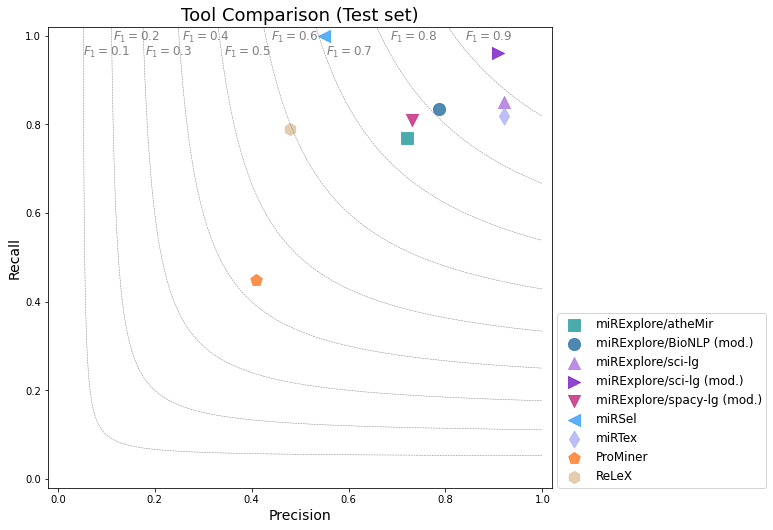

In [6]:
tools_fontsizes = {'ticks': 10,'title': 18, 'label':14, 'legend': 12, "dot": 150}

plot_results(all_runs, "Tool Comparison (Test set)", "allruns", figsize=(10,8), sortedEntries=True, test2color = test2col, fontsizes=tools_fontsizes, outfolder=outDirectory)

In [7]:
rules_fontsizes = {'ticks': 10,'title': 18, 'label':14, 'legend': 10, "dot": 75}

/mnt/extproj/projekte/bartelt/software/miniconda3/envs/mirexplore/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


0 1.0 0.48866498740554154 0.6565143824027072 
1 0.9690721649484536 0.5295774647887324 0.6848816029143898 conj
2 1.0 0.5159574468085106 0.6807017543859649 sdp
3 0.9845360824742269 0.6303630363036303 0.7686116700201208 compartment
4 0.9587628865979382 0.636986301369863 0.7654320987654322 context
5 0.9896907216494846 0.4860759493670886 0.6519524617996605 entity
6 0.9690721649484536 0.5611940298507463 0.7107750472589791 conj;sdp
7 0.9587628865979382 0.6940298507462687 0.8051948051948052 conj;compartment
8 0.9329896907216495 0.6703703703703704 0.7801724137931035 conj;context
9 0.9587628865979382 0.5269121813031161 0.680073126142596 conj;entity
10 0.9845360824742269 0.6678321678321678 0.7958333333333333 sdp;compartment
11 0.9587628865979382 0.657243816254417 0.779874213836478 sdp;context
12 0.9896907216494846 0.5133689839572193 0.6760563380281691 sdp;entity
13 0.9432989690721649 0.8026315789473685 0.8672985781990522 compartment;context
14 0.9742268041237113 0.627906976744186 0.76363636363636

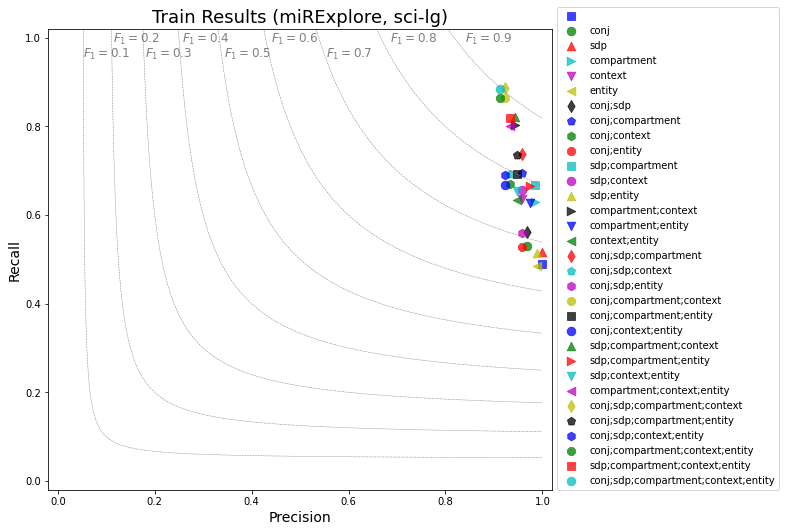

In [8]:
plot_results(results_train_scilg_bionlp_subseti, "Train Results (miRExplore, sci-lg)", "interaction", fontsizes=rules_fontsizes, outfolder=outDirectory)

/mnt/extproj/projekte/bartelt/software/miniconda3/envs/mirexplore/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


0 1.0 0.6077586206896551 0.7560321715817694 
1 0.9432624113475178 0.6785714285714286 0.7893175074183976 conj
2 1.0 0.618421052631579 0.7642276422764228 sdp
3 0.9858156028368794 0.7595628415300546 0.8580246913580246 compartment
4 0.9716312056737588 0.6618357487922706 0.7873563218390806 context
5 1.0 0.6077586206896551 0.7560321715817694 entity
6 0.9432624113475178 0.6927083333333334 0.7987987987987989 conj;sdp
7 0.9361702127659575 0.88 0.9072164948453608 conj;compartment
8 0.9148936170212766 0.7288135593220338 0.8113207547169811 conj;context
9 0.9432624113475178 0.6785714285714286 0.7893175074183976 conj;entity
10 0.9858156028368794 0.7679558011049724 0.8633540372670807 sdp;compartment
11 0.9716312056737588 0.6748768472906403 0.7965116279069767 sdp;context
12 1.0 0.618421052631579 0.7642276422764228 sdp;entity
13 0.9574468085106383 0.8333333333333334 0.8910891089108911 compartment;context
14 0.9858156028368794 0.7595628415300546 0.8580246913580246 compartment;entity
15 0.971631205673758

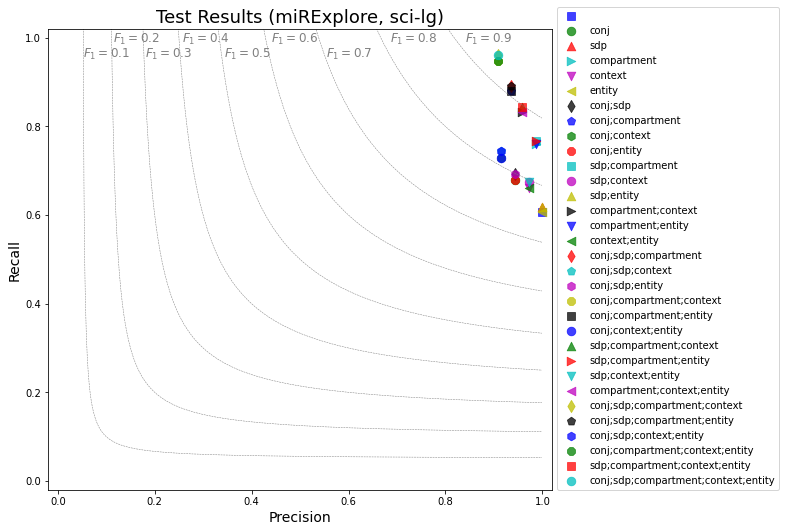

In [9]:
plot_results(results_test_scilg_bionlp_subseti, "Test Results (miRExplore, sci-lg)", "interaction", fontsizes=rules_fontsizes, outfolder=outDirectory)

/mnt/extproj/projekte/bartelt/software/miniconda3/envs/mirexplore/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


0 1.0 0.48866498740554154 0.6565143824027072 
1 0.9639175257731959 0.5067750677506775 0.6642984014209592 conj
2 0.9072164948453608 0.5028571428571429 0.6470588235294118 sdp
3 0.9072164948453608 0.5925925925925926 0.7169042769857433 compartment
4 0.9587628865979382 0.6326530612244898 0.7622950819672131 context
5 0.9896907216494846 0.4860759493670886 0.6519524617996605 entity
6 0.8711340206185567 0.52 0.651252408477842 conj;sdp
7 0.8711340206185567 0.6282527881040892 0.7300215982721382 conj;compartment
8 0.9226804123711341 0.6392857142857142 0.7552742616033755 conj;context
9 0.9536082474226805 0.5040871934604905 0.6595365418894831 conj;entity
10 0.8402061855670103 0.6269230769230769 0.7180616740088105 sdp;compartment
11 0.8711340206185567 0.66015625 0.7511111111111111 sdp;context
12 0.9020618556701031 0.501432664756447 0.6445672191528545 sdp;entity
13 0.8711340206185567 0.7511111111111111 0.8066825775656324 compartment;context
14 0.9020618556701031 0.5912162162162162 0.7142857142857143 c

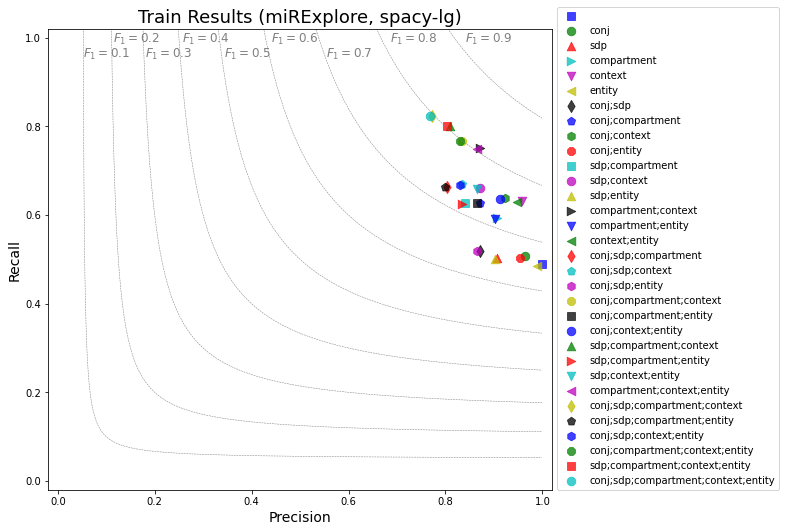

In [10]:
plot_results(results_train_spcylg_bionlp_subseti, "Train Results (miRExplore, spacy-lg)", "interaction", fontsizes=rules_fontsizes, outfolder=outDirectory)

/mnt/extproj/projekte/bartelt/software/miniconda3/envs/mirexplore/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


0 1.0 0.6077586206896551 0.7560321715817694 
1 0.9858156028368794 0.6376146788990825 0.7743732590529246 conj
2 0.8936170212765957 0.6 0.7179487179487181 sdp
3 0.8439716312056738 0.7041420118343196 0.767741935483871 compartment
4 0.9787234042553191 0.6509433962264151 0.7818696883852692 context
5 1.0 0.6077586206896551 0.7560321715817694 entity
6 0.8794326241134752 0.6326530612244898 0.7359050445103859 conj;sdp
7 0.8297872340425532 0.7548387096774194 0.7905405405405406 conj;compartment
8 0.9645390070921985 0.6834170854271356 0.7999999999999999 conj;context
9 0.9858156028368794 0.6376146788990825 0.7743732590529246 conj;entity
10 0.7588652482269503 0.6858974358974359 0.7205387205387205 sdp;compartment
11 0.8723404255319149 0.643979057591623 0.7409638554216867 sdp;context
12 0.8936170212765957 0.6 0.7179487179487181 sdp;entity
13 0.8297872340425532 0.7697368421052632 0.7986348122866895 compartment;context
14 0.8439716312056738 0.7041420118343196 0.767741935483871 compartment;entity
15 0.97

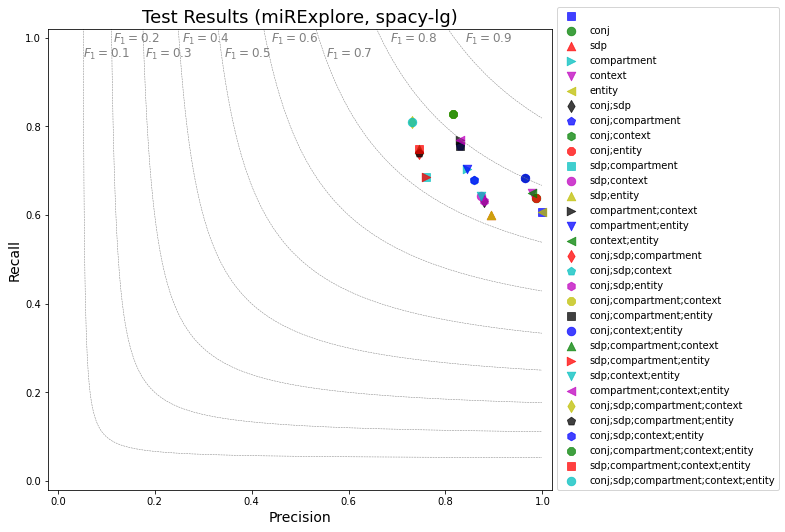

In [11]:
plot_results(results_test_spcylg_bionlp_subseti, "Test Results (miRExplore, spacy-lg)", "interaction", fontsizes=rules_fontsizes, outfolder=outDirectory)

/mnt/extproj/projekte/bartelt/software/miniconda3/envs/mirexplore/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


0 1.0 0.48866498740554154 0.6565143824027072 
1 0.979381443298969 0.521978021978022 0.6810035842293907 conj
2 1.0 0.5159574468085106 0.6807017543859649 sdp
3 0.9278350515463918 0.5921052631578947 0.7228915662650602 compartment
4 0.9587628865979382 0.636986301369863 0.7654320987654322 context
5 0.9896907216494846 0.4860759493670886 0.6519524617996605 entity
6 0.979381443298969 0.5523255813953488 0.7063197026022305 conj;sdp
7 0.9072164948453608 0.6376811594202898 0.7489361702127658 conj;compartment
8 0.9432989690721649 0.6606498194945848 0.7770700636942675 conj;context
9 0.9690721649484536 0.5193370165745856 0.6762589928057554 conj;entity
10 0.9278350515463918 0.6185567010309279 0.7422680412371134 sdp;compartment
11 0.9587628865979382 0.657243816254417 0.779874213836478 sdp;context
12 0.9896907216494846 0.5133689839572193 0.6760563380281691 sdp;entity
13 0.8917525773195877 0.7554585152838428 0.817966903073286 compartment;context
14 0.9226804123711341 0.5907590759075908 0.7203219315895372

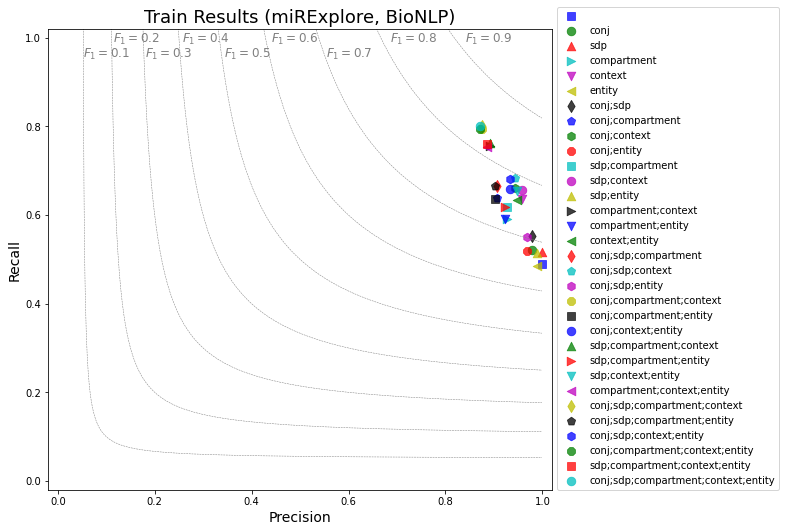

In [12]:
plot_results(results_train_bionlp_bionlp_subseti, "Train Results (miRExplore, BioNLP)", "interaction", fontsizes=rules_fontsizes, outfolder=outDirectory)

/mnt/extproj/projekte/bartelt/software/miniconda3/envs/mirexplore/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


0 1.0 0.6077586206896551 0.7560321715817694 
1 0.900709219858156 0.6287128712871287 0.7405247813411079 conj
2 1.0 0.6211453744493393 0.7663043478260869 sdp
3 0.9078014184397163 0.7231638418079096 0.8050314465408805 compartment
4 0.9716312056737588 0.6586538461538461 0.7851002865329513 context
5 1.0 0.6077586206896551 0.7560321715817694 entity
6 0.900709219858156 0.6446700507614214 0.7514792899408284 conj;sdp
7 0.8156028368794326 0.7718120805369127 0.793103448275862 conj;compartment
8 0.8723404255319149 0.6721311475409836 0.7592592592592592 conj;context
9 0.900709219858156 0.6287128712871287 0.7405247813411079 conj;entity
10 0.9078014184397163 0.7314285714285714 0.810126582278481 sdp;compartment
11 0.9716312056737588 0.6715686274509803 0.7942028985507247 sdp;context
12 1.0 0.6211453744493393 0.7663043478260869 sdp;entity
13 0.8794326241134752 0.7848101265822784 0.8294314381270902 compartment;context
14 0.9078014184397163 0.7231638418079096 0.8050314465408805 compartment;entity
15 0.9716

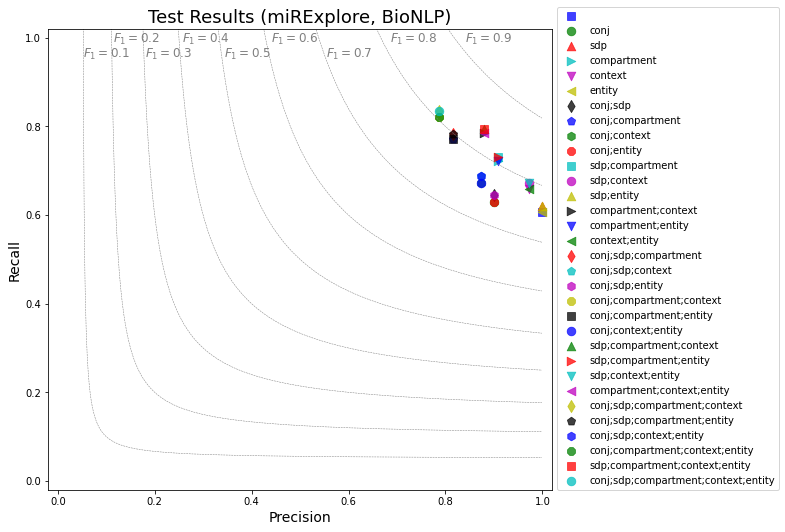

In [13]:
plot_results(results_test_bionlp_bionlp_subseti, "Test Results (miRExplore, BioNLP)", "interaction", fontsizes=rules_fontsizes, outfolder=outDirectory)

In [14]:
def transformres(indata, slot):
    outdata = defaultdict(lambda: defaultdict(lambda: dict()))
    
    for x in indata:       
        outdata[tuple(reversed(x))][slot] = indata[x][slot]["weighted avg"]
        
    return outdata
        

#transformres(results_test_scilg_bionlp_subsetc, slot="regulation")

/mnt/extproj/projekte/bartelt/software/miniconda3/envs/mirexplore/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


0 0.7323371771966868 0.45390070921985815 0.5604413211279287 
1 0.7659574468085106 0.6170212765957447 0.6834697217675942 compartment
2 0.7134956919289609 0.5106382978723404 0.5952587358921239 between
3 0.8371587365562885 0.7943262411347518 0.8151802333883378 counts
4 0.35311683463979093 0.5815602836879432 0.439421747898398 return
5 0.7587368826417638 0.6453900709219859 0.6974885700419854 compartment;between
6 0.8860012452038595 0.8439716312056738 0.8644758844044946 compartment;counts
7 0.6699465139841191 0.6099290780141844 0.6385305917978509 compartment;return
8 0.878406454254561 0.851063829787234 0.8645190009516754 between;counts
9 0.7565357521799136 0.6382978723404256 0.6924053915490633 between;return
10 0.8812111292962357 0.8439716312056738 0.8621894575533173 counts;return
11 0.8838381605370703 0.8652482269503546 0.8744444034171652 compartment;between;counts
12 0.7565357521799136 0.6382978723404256 0.6924053915490633 compartment;between;return
13 0.9261458750820453 0.8936170212765957

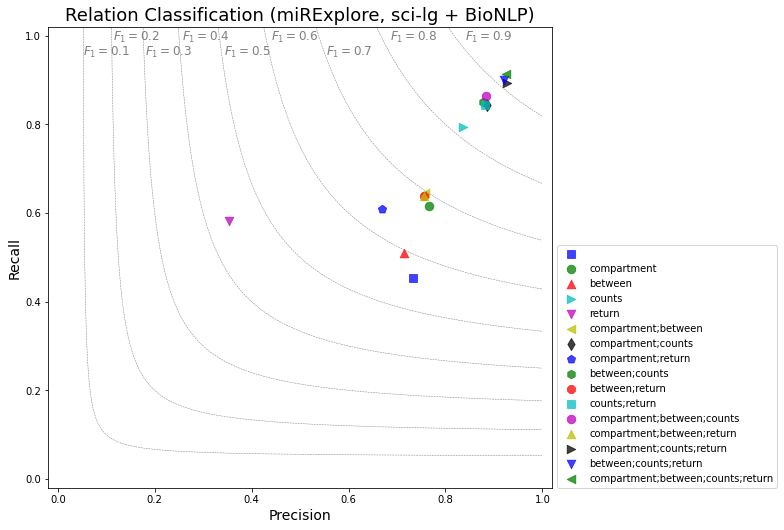

In [15]:
plot_results(transformres(results_test_scilg_bionlp_subsetc, slot="regulation"), "Relation Classification (miRExplore, sci-lg + BioNLP)", slot="regulation", fontsizes=rules_fontsizes, outfolder=outDirectory)